## Analyse Hauptnutzfläche / Geschossfläche

In [1]:
import seaborn as sns
import src.package.importer as im
import src.package.consts as c
import src.package.charts as charts

# set size of seaborn plots
charts.set_plot_size(sns)

df = im.get_dataset('../package/dataset.csv')
filtered_df = im.select_relevant_features(df)

### Allgemein

In [2]:
filtered_df[c.FIELD_AREA_MAIN_USAGE].describe()

count      447.000000
mean      3414.008949
std       4470.124217
min         75.000000
25%        724.500000
50%       1699.000000
75%       4125.500000
max      29437.000000
Name: area_main_usage, dtype: float64

In [3]:
filtered_df[c.FIELD_AREA_TOTAL_FLOOR_416].describe()

count      941.000000
mean      6490.333688
std       8702.532298
min         13.000000
25%       1433.000000
50%       3432.000000
75%       7772.000000
max      75328.000000
Name: area_total_floor_416, dtype: float64

### Visualisierungen
Zeigt **Hauptnutzfläche** in relation zur **Geschossfläche**.

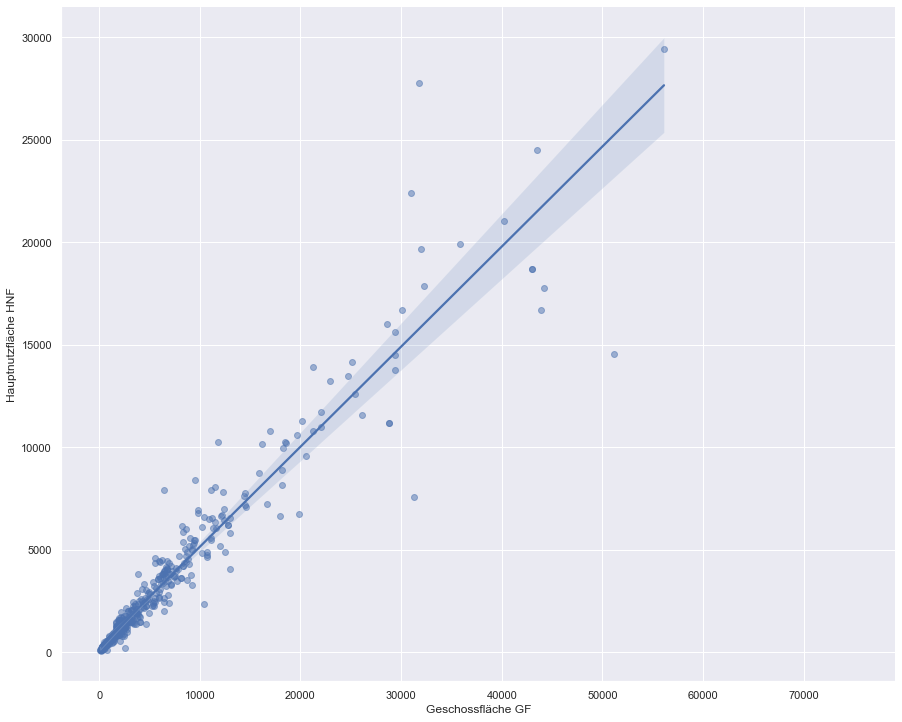

In [4]:
charts.lmplot_gf_hnf(filtered_df)

<AxesSubplot:xlabel='Geschossfläche GF', ylabel='Hauptnutzfläche HNF'>

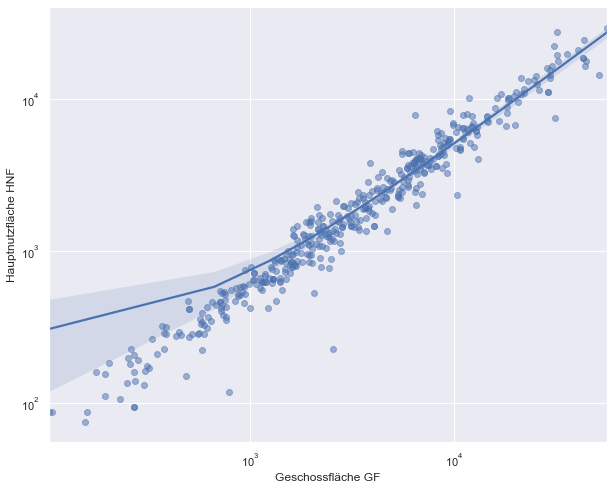

In [5]:
charts.regplot_gf_hnf(filtered_df, logscale=True)

#### 75% Perzentil

/Users/lucadietiker/Documents/05_Projects/Python.nosync/ip5-metriken-bauwesen/src/package/importer.py:71: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  capped_df = capped_df[df[c.FIELD_AREA_TOTAL_FLOOR_416] <= gf_upper]


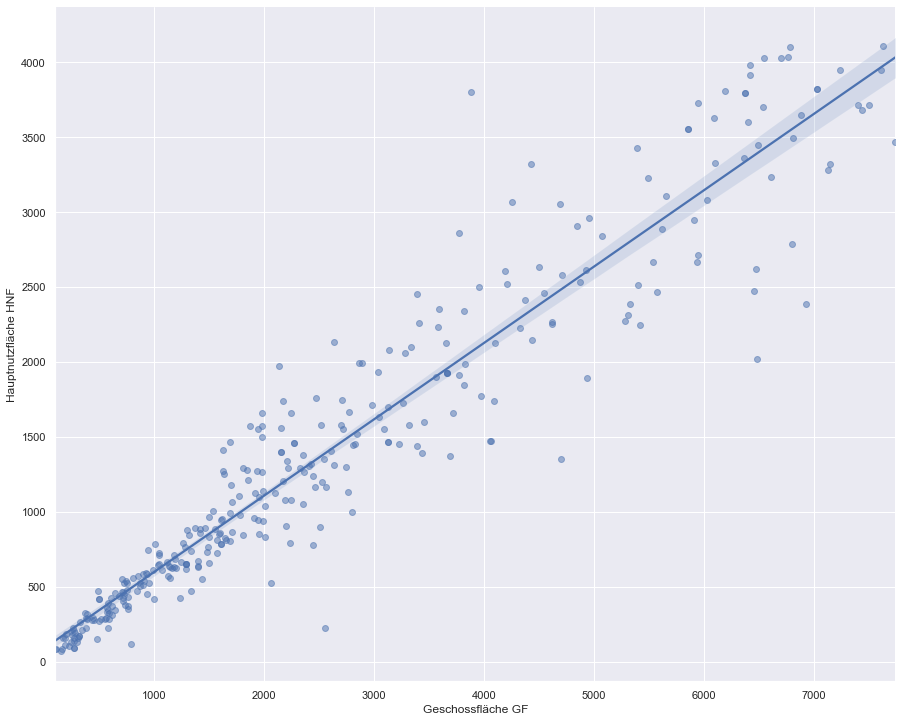

In [6]:
df_75_percentile = im.cap_upper_gf_hnf(filtered_df)
charts.lmplot_gf_hnf(df_75_percentile)

#### 25% Perzentil

/Users/lucadietiker/Documents/05_Projects/Python.nosync/ip5-metriken-bauwesen/src/package/importer.py:71: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  capped_df = capped_df[df[c.FIELD_AREA_TOTAL_FLOOR_416] <= gf_upper]


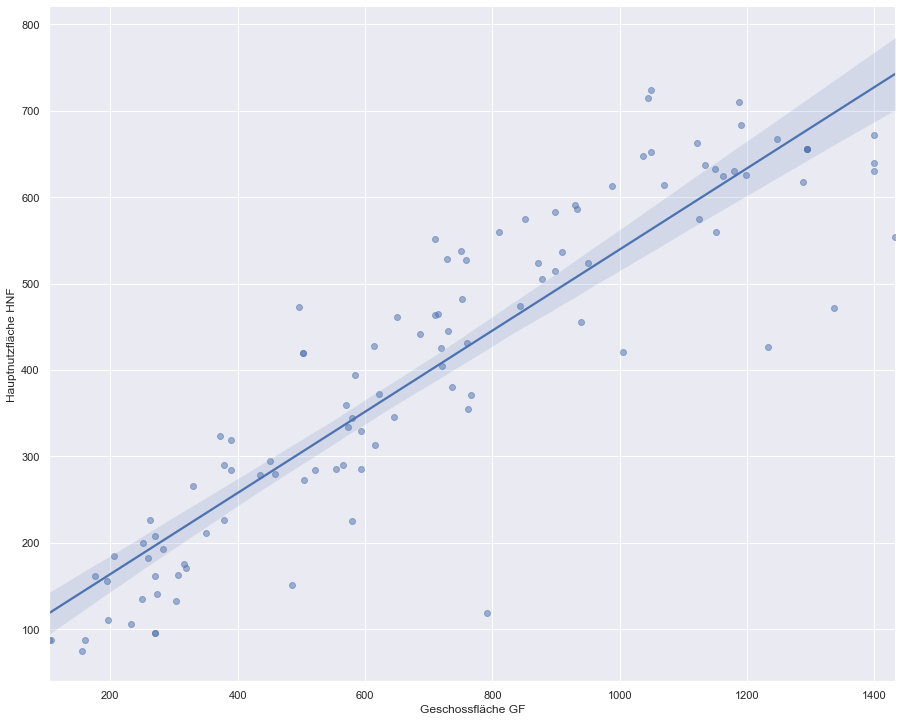

In [7]:
df_25_percentile = im.cap_upper_gf_hnf(filtered_df, upper_percentile='25%')
charts.lmplot_gf_hnf(df_25_percentile)

#### Clustering

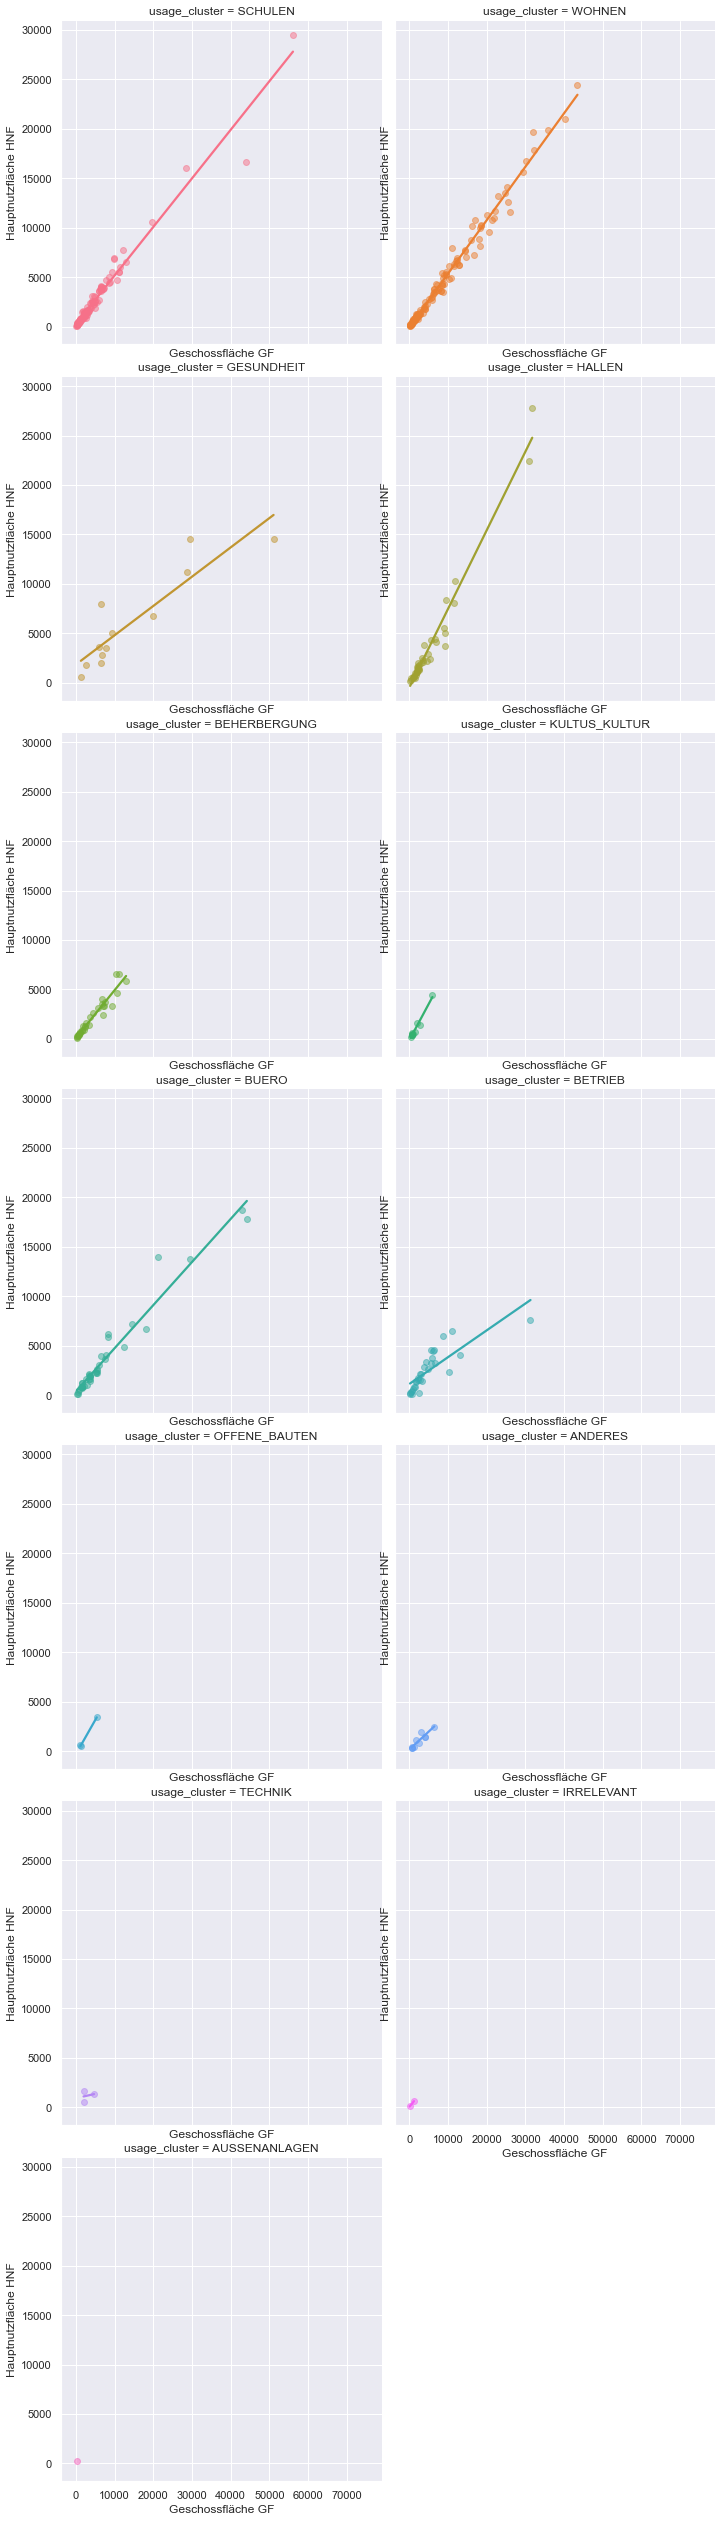

In [8]:
gf = sns.lmplot(
    data=filtered_df,
    x=c.FIELD_AREA_TOTAL_FLOOR_416, y=c.FIELD_AREA_MAIN_USAGE,
    col=c.FIELD_USAGE_CLUSTER,
    hue=c.FIELD_USAGE_CLUSTER,
    scatter_kws={'alpha':0.5},
    ci=None, col_wrap=2,
)

gf.set(xlabel=charts.LABEL_GF, ylabel=charts.LABEL_HNF)